## Breast Cancer prediction

### A binary classification problem

In [1]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from binary_classification import tools as bc
from binary_classification.models import Model

In [2]:
data_path = "../data/clean_breast_cancer.csv"
target = 'diagnosis'
predictors = ['radius_mean', 'perimeter_mean']

In [3]:
df = bc.load_data(data_path)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [4]:
data = bc.split_train_test(df, predictors, target) 

In [5]:
data.keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

## Logistic Regression

In [6]:
model_obj = Model('LogisticRegression', optimization=True)

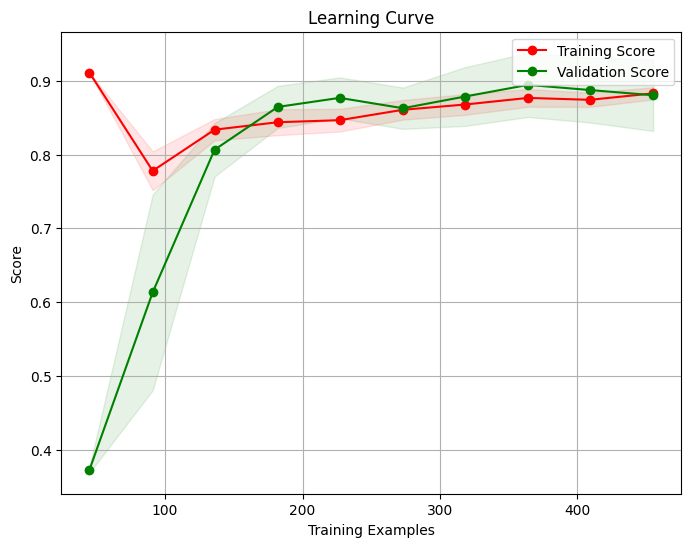

In [7]:
bc.plot_learning_curve(model_obj, df[predictors], df[target], cv=5)

Overfiting. 

For model LogisticRegression:

Results for train set:

   accuracy  precision  recall   f1  auc_roc
0    0.8703     0.9365  0.6982  0.8   0.8351

Results for test set:

   accuracy  precision  recall      f1  auc_roc
0    0.9298        1.0   0.814  0.8974    0.907


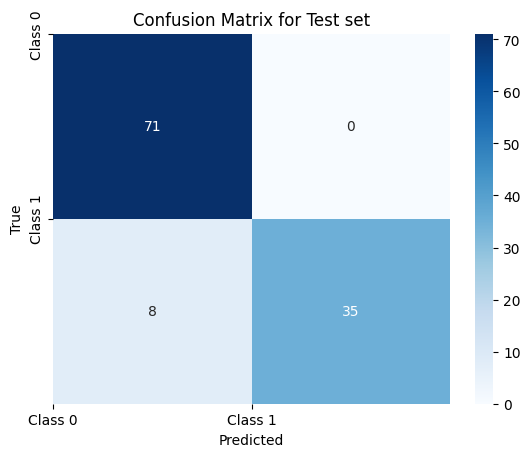

In [8]:
bc.train_and_evaluate_model(model_obj, data)

In [9]:
# Hyperparameter_optimization
best_params = bc.hyperparameter_optimization(model_obj.model,
                                             model_obj.hyperparams_to_optimize,
                                             df[predictors],
                                             df[target],
                                             cv=5)

Best hyperparameters found: {'C': 10000, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.9016


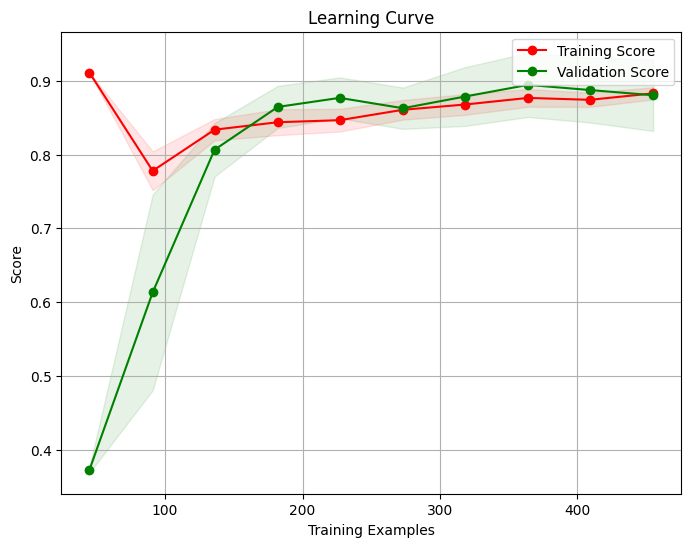

In [10]:
# Study with best params.

model_obj = Model('LogisticRegression', best_params)

bc.plot_learning_curve(model_obj, df[predictors], df[target], cv=5)

For model LogisticRegression:

Results for train set:

   accuracy  precision  recall   f1  auc_roc
0    0.8703     0.9365  0.6982  0.8   0.8351

Results for test set:

   accuracy  precision  recall      f1  auc_roc
0    0.9298        1.0   0.814  0.8974    0.907


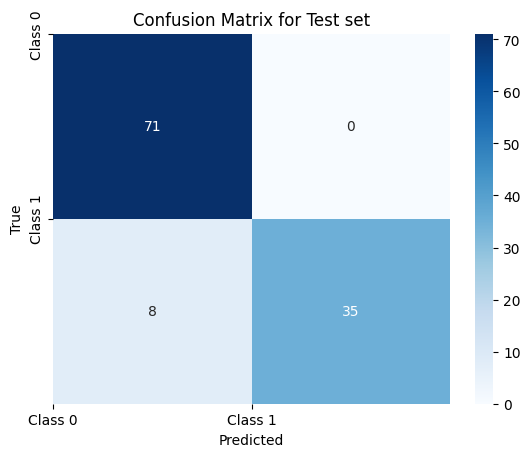

In [11]:
bc.train_and_evaluate_model(model_obj, data, store_outputs=True)